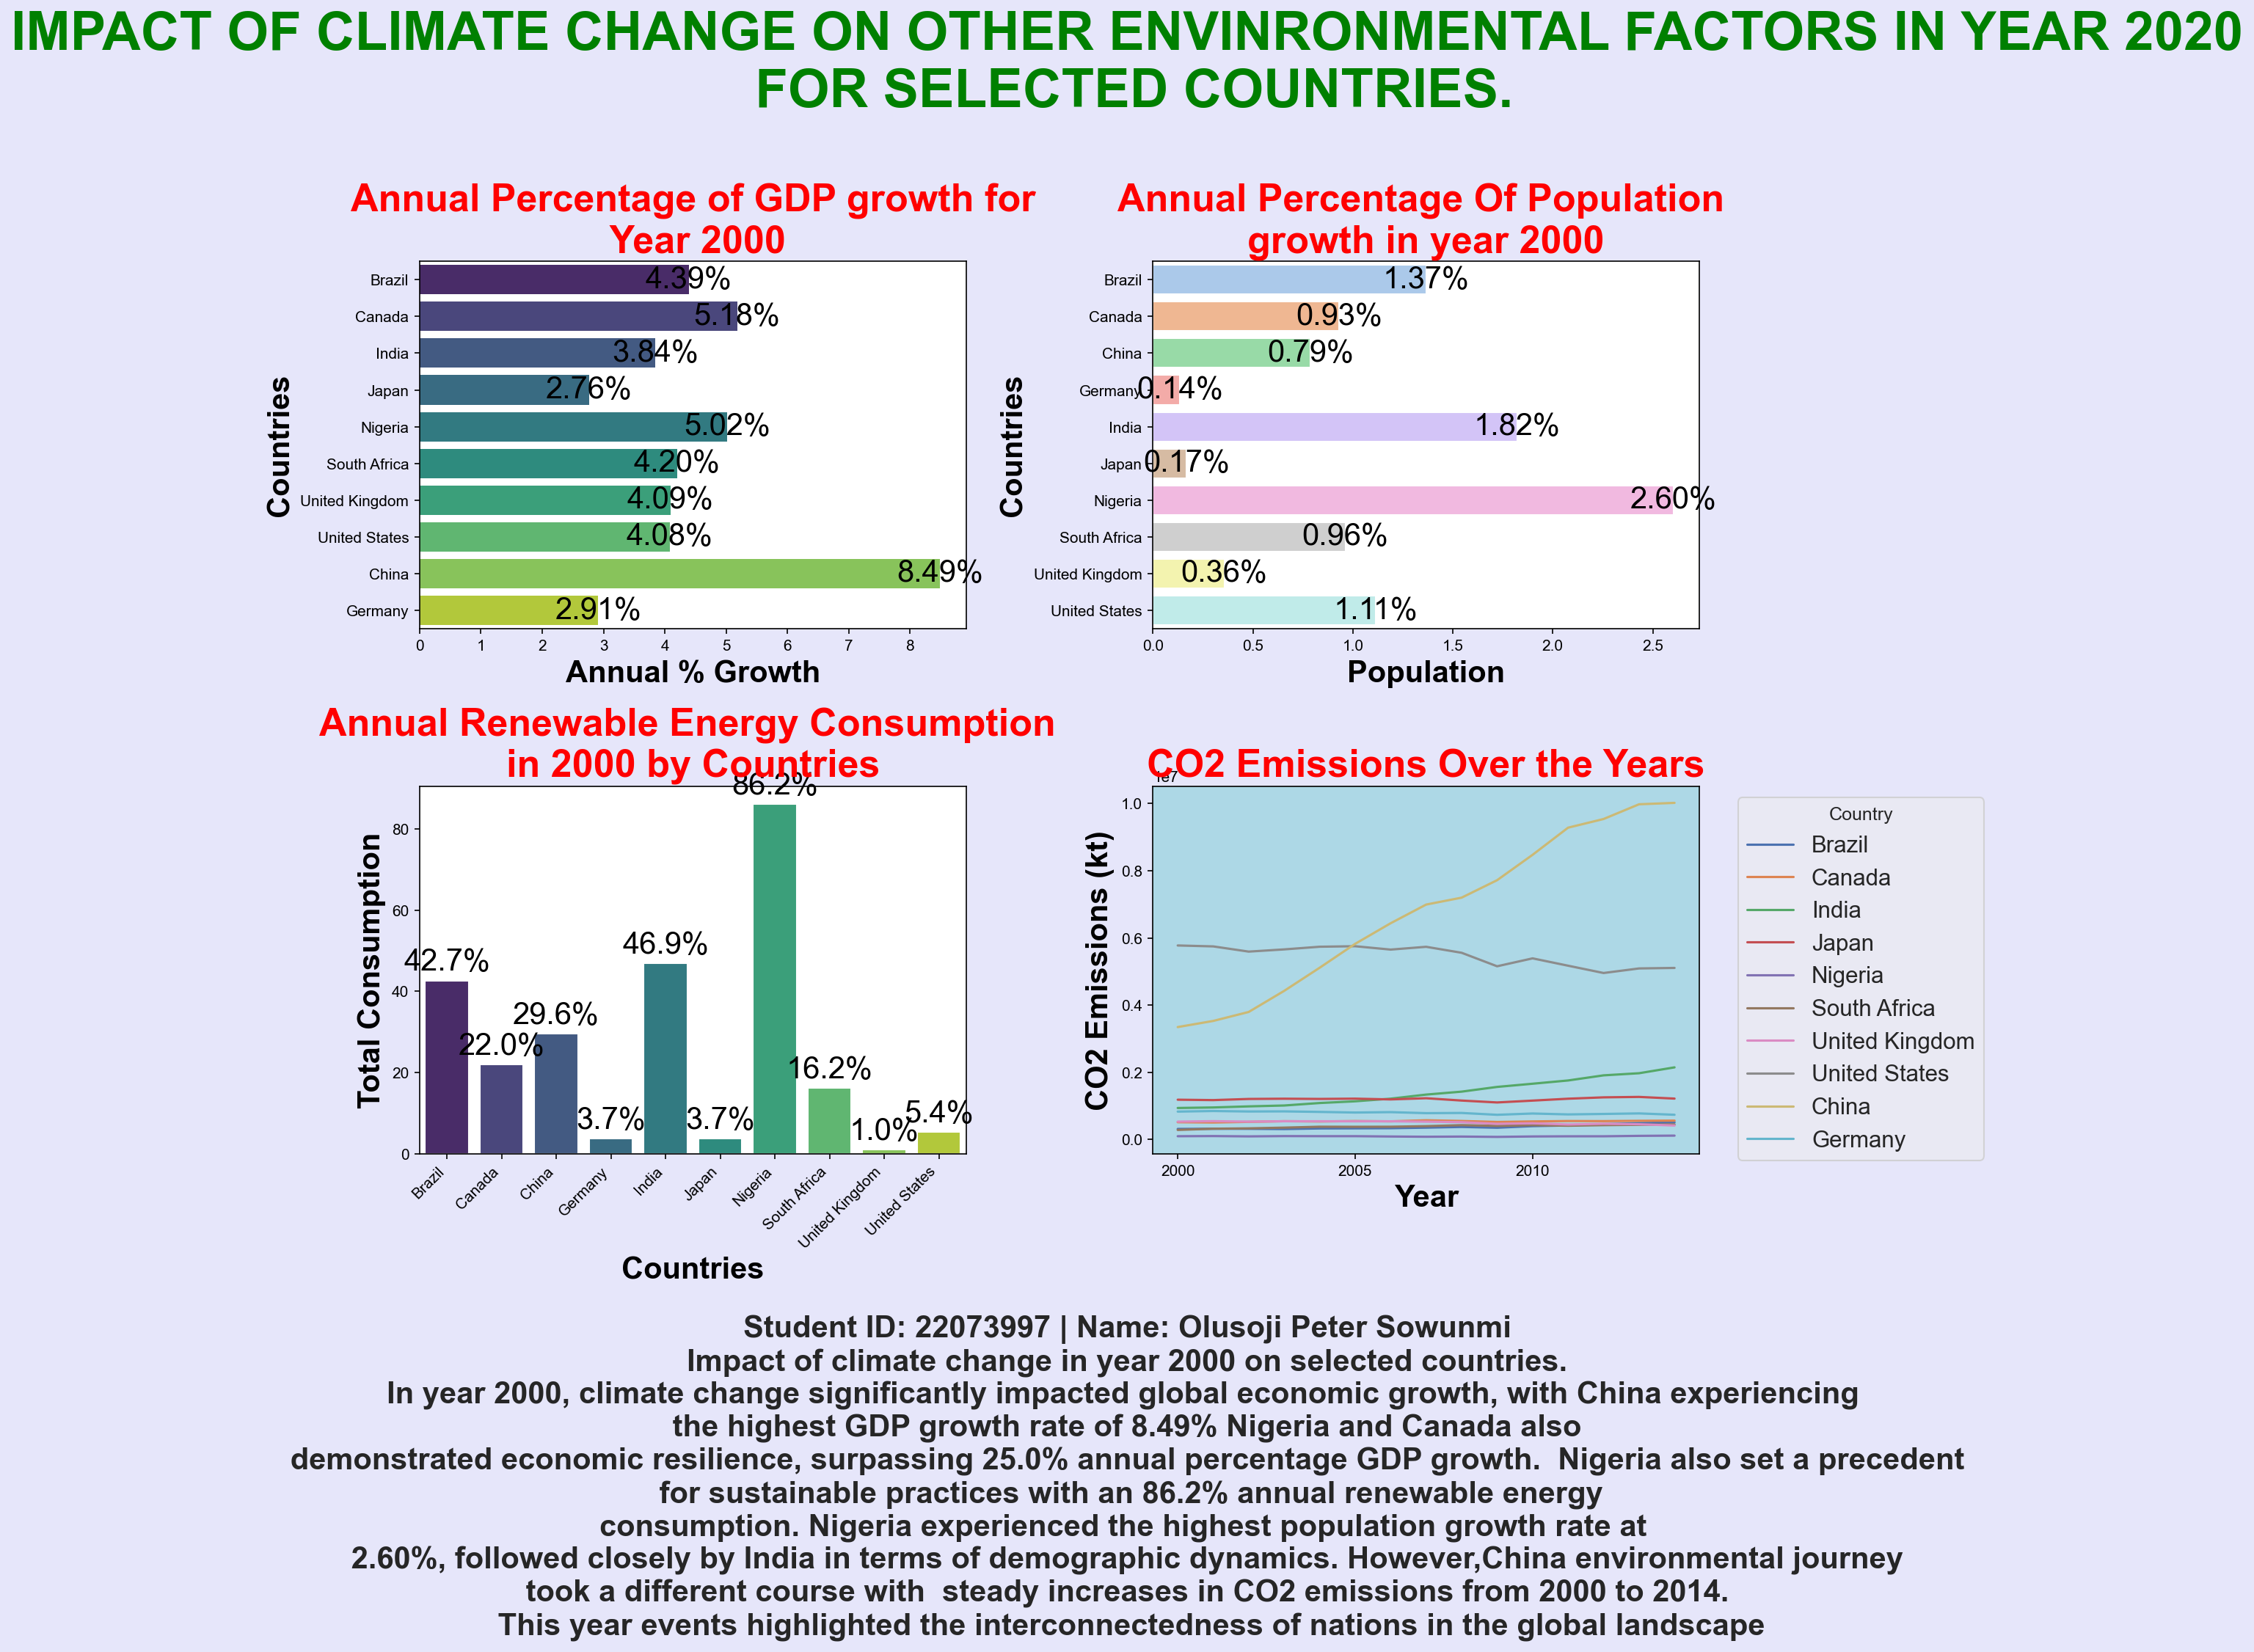

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
Created on Thu Nov 16 12:41:38 2023

@author: apple
"""
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to read my csv file and set index


def csv_file_and_set_index(file_name):
    """
    Read a CSV file into a DataFrame and set the 'Country Name' column as 
    the index.

    Parameters:
    - file_name (str): The name of the CSV file.

    Returns:
    - pd.DataFrame: The DataFrame with the 'Country Name' column set as the 
    index.
    """

    df = pd.read_csv(file_name, index_col='Country Name')

    return df


file_name = 'dhv.csv'
df = csv_file_and_set_index(file_name)


# Data cleaning/wrangling
# drop columns that are not needed(country code and series code)
df.drop(columns=['Country Code', 'Series Code'], inplace=True)


# reset the column axis of my dataframe
df.set_axis(['Series_Name', '2000', '2001', '2002', '2003', '2004',
             '2005', '2006', '2007', '2008', '2009', '2010', '2011',
             '2012', '2013', '2014'], axis=1, inplace=True)

#statistical info about the data
df.describe()
# created a new data frame where series name is forest area using loc

forest_area_df = df[df.loc[:, "Series_Name"]
                    == 'Forest area (% of land area)']


# created a new data frame where series name is Population growth (annual %)
# using loc
population_df = df[df.loc[:, "Series_Name"] == 'Population growth (annual %)']


# created a new data frame where series name is renewable energy consumption
# (% of total final energy consumption)using loc
renewable_energy_consumption_df = df[df.loc[:, "Series_Name"] ==
        'Renewable energy consumption (% of total final energy consumption)']


# created a new data frame where series name is GDP growth (annual %)
# using loc
gdp_df = df[df.loc[:, "Series_Name"] == 'GDP growth (annual %)']


# created a new data frame where series name is CO2 emissions (kt) using loc
co2_df = df[df.loc[:, "Series_Name"] == 'CO2 emissions (kt)']


# created a new dataframe, gdp_data for year 2000 only
gdp_data = gdp_df.loc[:, ['2000']]
# Set the figure size and subplot
fig, axs = plt.subplots(2, 2, figsize=(16, 12), facecolor='#E6E6FA', dpi=150)
fig.suptitle('IMPACT OF CLIMATE CHANGE ON OTHER ENVINRONMENTAL FACTORS IN YEAR 2020\n FOR SELECTED COUNTRIES.',
             fontsize=35, fontweight='bold', color='green')

# Plotting the horizontal bar plot using Seaborn for GDP Growth
barplot = sns.barplot(ax=axs[0, 0], y=gdp_data.index,
                      x='2000', data=gdp_data, palette='viridis')

axs[0, 0].set_title('Annual Percentage of GDP growth for\n Year 2000', 
                    fontsize=25,
                    fontweight='bold', color='red')
axs[0, 0].set_ylabel('Countries', fontsize=20,
                     fontweight='bold', color='black')
axs[0, 0].set_xlabel('Annual % Growth', fontsize=20,
                     fontweight='bold', color='black')

# Set the background color of the first subplot
axs[0, 0].set_facecolor('white')
# Add values on top of the bars
for p in barplot.patches:
    barplot.annotate(f'{p.get_width():.2f}%',
                     (p.get_width(), p.get_y() + p.get_height() / 2),
                     ha='center', va='center', fontsize=20, color='black')


# Created a new dataframe for the population data for year 2000 only
population_data = population_df.groupby('Country Name')['2000'].sum()

# Set Seaborn style
sns.set_theme()

# Create a horizontal bar chart
barplot2 = sns.barplot(ax=axs[0, 1], y=population_data.index,
                       x=population_data, palette='pastel', orient='h')
axs[0, 1].set_title('Annual Percentage Of Population \ngrowth in year 2000',
                    fontsize=25, fontweight='bold', color='red')
axs[0, 1].set_xlabel('Population', fontsize=20,
                     fontweight='bold', color='black')
axs[0, 1].set_ylabel('Countries', fontsize=20,
                     fontweight='bold', color='black')

# Add values on top of the bars
for i in barplot2.patches:
    barplot2.annotate(f'{i.get_width():.2f}%',
                      (i.get_width(), i.get_y() + i.get_height() / 2),
                      ha='center', va='center', fontsize=20, color='black')


# created a new dataframe, renewable_energy_consumption_datafor
# for the sum of renewable energy consumed in year 2000 by all countries
renewable_energy_consumption_data = renewable_energy_consumption_df.groupby(
    'Country Name')['2000'].sum()

# Set Seaborn style
sns.set_theme()

# Create a bar plot with different colors
sns.barplot(x=renewable_energy_consumption_data.index,
            y=renewable_energy_consumption_data, palette='viridis',
            ax=axs[1, 0])

# Add percentage labels on each bar
for i, value in enumerate(renewable_energy_consumption_data):
    axs[1, 0].text(i, value + 1, f'{value:.1f}%',
                   ha='center', va='bottom', fontsize=20, color='black')

axs[1, 0].set_title('Annual Renewable Energy Consumption \nin 2000 by Countries',
                    fontsize=25, fontweight='bold', color='red')

axs[1, 0].set_xlabel('Countries', fontsize=20,
                     fontweight='bold', color='black')
axs[1, 0].set_ylabel('Total Consumption', fontsize=20,
                     fontweight='bold', color='black')
axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels(), rotation=45, ha='right')
axs[1, 0].set_facecolor('white')


# Created a new dataframe for the co2 emmsion over the years
co2_df_data = co2_df.iloc[:, 1:].transpose()

# Set the Seaborn theme
sns.set_theme()

# Plotting the line graph using seaborn
sns.lineplot(data=co2_df_data, dashes=False, ax=axs[1, 1])

axs[1, 1].set_title('CO2 Emissions Over the Years',
                    fontsize=25, fontweight='bold', color='red')
axs[1, 1].set_xlabel('Year', fontsize=20, fontweight='bold', color='black')
axs[1, 1].set_ylabel('CO2 Emissions (kt)', fontsize=20,
                     fontweight='bold', color='black')
axs[1, 1].legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left',
                 fontsize=15)
# Adjust x-axis tick positions for better readability
axs[1, 1].set_xticks(axs[1, 1].get_xticks()[::5])
# Set the background color of the first subplot
axs[1, 1].set_facecolor('lightblue')
# Adjust the subplot layout for better visualization
# Set up subplot grid
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Add text to the figure
text_1 = 'Student ID: 22073997 | Name: Olusoji Peter Sowunmi\nImpact of'
text_1 += ' climate change in year 2000 on selected countries.'
plt.text(.5, -0.05, text_1, transform=fig.transFigure, ha='center',
         fontsize=20, fontweight='bold')

text_2 = 'In year 2000, climate change significantly impacted global economic '
text_2 += 'growth, with China experiencing \n the highest GDP growth'
text_2 += ' rate of 8.49% Nigeria and Canada also \n demonstrated economic '
text_2 += 'resilience, surpassing 25.0% annual percentage GDP growth.'
text_2 += '  Nigeria also set a precedent \n for sustainable practices '
text_2 += 'with an 86.2% annual renewable energy'
plt.text(.5, -0.15, text_2, transform=fig.transFigure, ha='center',
         fontsize=20, fontweight='bold')

text_3 = 'consumption. Nigeria experienced the highest population growth rate '
text_3 += 'at \n 2.60%, followed closely by India in terms of demographic'
text_3 += ' dynamics. However,China environmental journey \n '
text_3 += 'took a different course with  steady increases in '
text_3 += 'CO2 emissions from 2000 to 2014. \n This year events highlighted '
text_3 += 'the interconnectedness of nations in the global landscape'
plt.text(.5, -0.25, text_3, transform=fig.transFigure, ha='center',
         fontsize=20, fontweight='bold')

# Save the figure
plt.show()
